In [30]:
!nvidia-smi

Mon Jul 15 18:18:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              28W /  70W |  15021MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

1.working on Multimodel Deep Learning Archietecture called CLIP Which Link text with visual elimination we combine with generative model with transformer type of archietecture

 2.we will be able to text prompt and generate visualize image and video and video sequence from text prompt



In [2]:
!git clone https://github.com/openai/CLIP.git

Cloning into 'CLIP'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 256 (delta 6), reused 4 (delta 0), pack-reused 243
Receiving objects: 100% (256/256), 8.93 MiB | 7.54 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [3]:
!git clone https://github.com/CompVis/taming-transformers

Cloning into 'taming-transformers'...
remote: Enumerating objects: 1342, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 1342 (delta 0), reused 1 (delta 0), pack-reused 1340
Receiving objects: 100% (1342/1342), 409.77 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (282/282), done.


In [4]:
!pip install --no-deps ftfy regex tqdm  # installing packages(ftfy,regex,tqdm)without the dependcies
!pip install omegaconf==2.0.0 pytorch-lightning=1.0.8 # installing specific version of the package
!pip uninstall torchext --yes # uninstalling with confirmation of yes
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00
ERROR: Invalid requirement: 'pytorch-lightning=1.0.8'
Hint: = is not a valid operator. Did you mean == ?
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.1 MB/s eta 0:00:00


In [5]:
!pip install omegaconf==2.0.0 pytorch-lightning==1.0.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

einops---library which is used for machine and deep learning for reshaping and manipulating tensors

In [6]:
import PIL # dealing with images
import numpy as np # dealing with arrays
import pandas as pd # dealing with dataframe
import matplotlib.pyplot as plt # for vizualisation

In [7]:
import torch,os,imageio,pdb,math
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF


#### Torch :
It is a pytorch library a popular for deep learning lbrary in python.It provides tensor computations and support bulding and training neural networks
#### OS:
It provides a way of interacting with OS and allows to perform differennt OS related tasks
#### imageio:
The imageio library is used for reading and writing image in various formats.It is mostly used in CV.
#### PDB:
The PDB is a python debugger.It allows to debug python code , set brreak points andd inspect
#### math:
The math function provides mathematical function and constants.It include functions like cos,sin,sqrt

In [8]:
import yaml
from omegaconf import OmegaConf

from CLIP import clip

import warnings
warnings.filterwarnings('ignore')

Helper function:

The helper function will be helpful for us to show img from tenser.
A Tensor is a multi dimension array of numbers.It can have any number of dimenson(0-D,1-D,2-D,...N-D) then clone th etensor and we take the data multiply by 255 (pixel range 0-255)

### Transpose:

It refers to specific permutation of the axes in 3d array or tesor.This operation is performed for array manipulation


### Transpose(1,2,0):

It indicate that the original axes ahould be rearranged so that the orginial axes order should be rearranged so orginal axes 1 becomes new axis 0, the original axis 2 becomes 1 and original axis 0 becomes 2


In [9]:
def show_from_tensor(tensor):
  img=tensor.clone()
  img=img.mul(255)
  img=img.cpu.numpy().transpose((1,2,0))

  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

def norm_data(data):
  return(data.clip(-1,1)+1)/2  # result is range between 0 and 1

#data.clip -- the clip method used to limit the array if larger than 1 it is set to 1 if lesser than -1 set to -1
# +1 is means 1 is added to each element of the clipped array

# Parameters
learning_rate=.5
batch_size=1
wd=.1
noise_factor=.22
total_itr=400
im_shape=[450,450,3] #height,width,channel
size1,size2,channels=im_shape


wd:

weight decay is a regularization technique used to prevent overfittingin a model
wd=0.1 implies weight decay is added to the loss function during training and regularization strenght is set to 0.1

noise_factor:

It is Likely refers to the strength or intensity of the noise that being added to the mage

## Loading the model

SET UP CLIP MODEL

1. Clipmodel - It will convert text to image & image-text matching, zero-shot classification, etc. underscore (returned by the clip.load function)

2. Clip.load -> This function is part of the CLIP library and is used to load pre-trained CLIP models. The argument 'ViT-B/32' specifies the specific variant of the CLIP model to load (in this case, ViT-B/32).

3. Jit =false -> Just-In-Time (JIT) compilation should not be used. JIT compilation is a technique that can improve the execution speed of the model, but in this case, it seems to be turned off.

4. Clipmodel_eval() == After calling clipmodel.eval(), the CLIP model is set to evaluation mode. If the model contains layers such as dropout or batch normalization, these layers will now work in evaluation mode

In [10]:
clipmodel, _ = clip.load('ViT-B/32', jit=False)
clipmodel.eval()
print(clip.available_models())

print("clip model visual input resolution: ",clipmodel.visual.input_resolution)

device=torch.device("cuda:0")
torch.cuda.empty_cache()

100%|███████████████████████████████████████| 338M/338M [00:10<00:00, 32.5MiB/s]


['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']
clip model visual input resolution:  224


In [11]:
%cd taming-transformers/

!mkdir -p models/vqgan_imagenet_f16_16384/checkpoints
!mkdir -p models/vqgan_imagenet_f16_16384/configs

#wget -- used to download files from the internet

if len(os.listdir('models/vqgan_imagenet_f16_16384/checkpoints'))==0:
  !wget 'https://heibox.uni-heidelberg.de/f/867b05fc8c4841768640/?dl=1' -O 'models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt'
  !wget 'https://heibox.uni-heidelberg.de/f/274fb24ed38341bfa753/?dl=1' -O 'models/vqgan_imagenet_f16_16384/configs/model.yaml'

/content/taming-transformers
--2024-07-15 18:04:51--  https://heibox.uni-heidelberg.de/f/867b05fc8c4841768640/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/c641a3e4-a869-4412-97ad-d0ce62422fd6/last.ckpt [following]
--2024-07-15 18:04:52--  https://heibox.uni-heidelberg.de/seafhttp/files/c641a3e4-a869-4412-97ad-d0ce62422fd6/last.ckpt
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 980092370 (935M) [application/octet-stream]
Saving to: ‘models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt’

models/vqgan_imagen 100%[===================>] 934.69M  13.0MB/s    in 69s     

2024-07-15 18:06:01 (13.5 MB/s) - ‘models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt’ saved [980092370/980

SETUP TAMING TRANSFORMER

1. %cd taming-transformers/ → changing the working directory to the "taming-transformers" directory.

2. !mkdir -p models/vqgan_imagenet_f16_16384/checkpoints →   This is the path where the directory structure will be created. It includes nested directories.

3. !mkdir -p models/vqgan_imagenet_f16_16384/configs

4. -p → ensures that all these directories are created even if "models " or "vqgan_magnet_f16_16384" do not exist

5. models: This is the main directory.

6. vqgan_imagenet_f16_16384: This is a subdirectory within "models."

7. chckpoints → THi is another subdirectory within "vqgan_imagenet_f16_16384"

8. configs → This is another subordinary within "vqgan_imagenet_f16_16384"

# Loading the model

In [12]:
!pip install torch torchtext pytorch-lightning

In [13]:
!pip install torchtext==0.9.0

ERROR: Could not find a version that satisfies the requirement torchtext==0.9.0 (from versions: 0.1.1, 0.2.0, 0.2.1, 0.2.3, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0)
ERROR: No matching distribution found for torchtext==0.9.0


In [16]:
from taming.models.vqgan import VQModel
from omegaconf import OmegaConf
import yaml
import torch

def load_config(config_path, display=False):
    config_data = OmegaConf.load(config_path)
    if display:
        print(yaml.dump(OmegaConf.to_container(config_data)))
    return config_data

def load_vqgan(config, chk_path=None):
    model = VQModel(**config.model.params)
    if chk_path is not None:
        state_dict = torch.load(chk_path, map_location='cpu')['state_dict']
        missing, unexpected = model.load_state_dict(state_dict, strict=False)
    return model.eval()


def generator(x):
    x = taming_model.post_quant_conv(x)
    x = taming_model.decoder(x)
    return x

taming_config = load_config("./models/vqgan_imagenet_f16_16384/configs/model.yaml", display=True)
taming_model = load_vqgan(taming_config, chk_path="./models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt")


model:
  base_learning_rate: 4.5e-06
  params:
    ddconfig:
      attn_resolutions:
      - 16
      ch: 128
      ch_mult:
      - 1
      - 1
      - 2
      - 2
      - 4
      double_z: false
      dropout: 0.0
      in_channels: 3
      num_res_blocks: 2
      out_ch: 3
      resolution: 256
      z_channels: 256
    embed_dim: 256
    lossconfig:
      params:
        codebook_weight: 1.0
        disc_conditional: false
        disc_in_channels: 3
        disc_num_layers: 2
        disc_start: 0
        disc_weight: 0.75
      target: taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminator
    monitor: val/rec_loss
    n_embed: 16384
  target: taming.models.vqgan.VQModel

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 156MB/s]


8.19kB [00:00, 382kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [17]:
## Declare the values that are going to optimize

class Parameters(torch.nn.Module):
  def init(self):
    super (Parameters, self).__init_()
    self.data=.5*torch.randn(batch_size, 256, size1//16, size2//16).cuda() # 1x256x14x15 (225/16,
    self.data=torch.nn.Parameter(torch.sin(self.data))

    def forward(self):
      return self.data

    def init_params():
      params=Parameters().cuda()
      optimizer = torch.optim.AdamW([{'params': [params.data], 'lr': learning_rate}], weight_decay=wd)
      return params, optimizer

1.torchvision.transforms.Normalize--- This is a transformation
from the torchvision library that normalizes the input image

2.(mean value) the first tuple contains the mean values for each channel(red,gree,blue).In this case the mean values are((0.48145466, 0.4578275, 0.40821073))

3.(std_dev_val) the second tuple contains the standard deviation values for each channel.In this case the std are((0.26862954, 0.26130258,0.27577711))

torch.Size([1, 256, 28, 28])


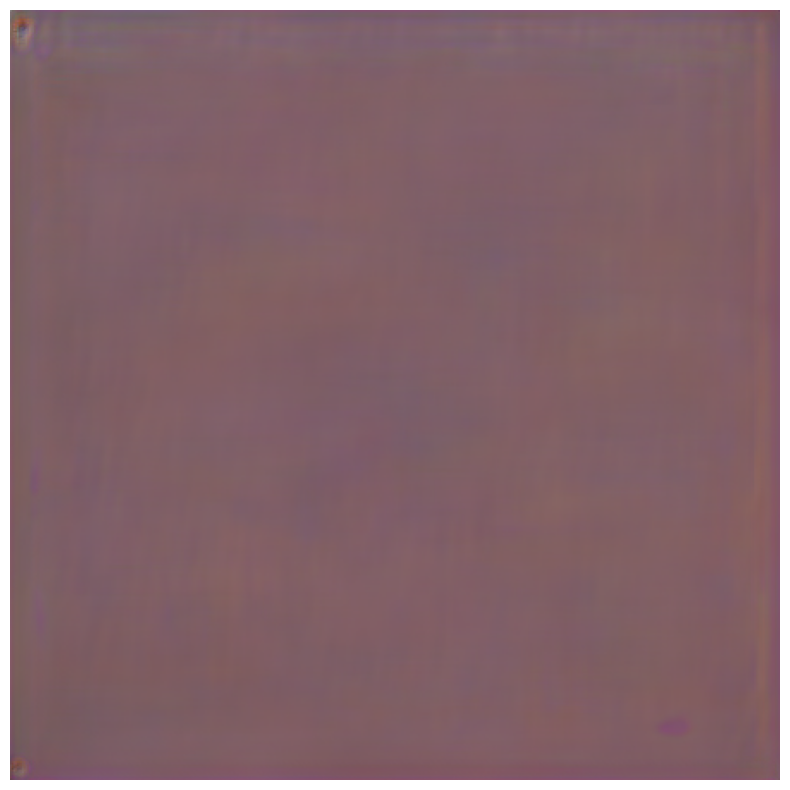

In [18]:

# Define normalization
normalize = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                                             (0.26862954, 0.26130258, 0.27577711))

# Load CLIP model
clipmodel, preprocess = clip.load("ViT-B/32", device="cuda")

# Class to declare parameters to be optimized
class Parameters(torch.nn.Module):
    def __init__(self):
        super(Parameters, self).__init__()
        self.data = 0.5 * torch.randn(1, 256, 28, 28).cuda()  # Adjust size1, size2 accordingly
        self.data = torch.nn.Parameter(torch.sin(self.data))

    def forward(self):
        return self.data

# Function to initialize parameters and optimizer
def init_params():
    params = Parameters().cuda()
    optimizer = torch.optim.AdamW([{'params': params.parameters(), 'lr': learning_rate}], weight_decay=wd)
    return params, optimizer

# Function to encode text
def encodeText(text):
    t = clip.tokenize([text]).cuda()  # Tokenize the text
    t = clipmodel.encode_text(t).detach().clone()  # Encode the text
    return t

def createEncodings(include, exclude, extras):
    include_enc = [encodeText(text) for text in include]
    exclude_enc = encodeText(exclude) if exclude else 0
    extras_enc = encodeText(extras) if extras else 0
    return include_enc, exclude_enc, extras_enc

# Define augmentation transform
augTransform = torch.nn.Sequential(
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomAffine(30, (0.2, 0.2), fill=0),
    torchvision.transforms.Resize((224, 224))  # Resize images to 224x224
).cuda()

# Assuming taming_model is already defined and initialized
def generator(x):
    x = taming_model.post_quant_conv(x)
    x = taming_model.decoder(x)
    return x

# Function to display image from tensor
def show_from_tensor(tensor):
    img = tensor.clone()
    img = img.mul(255).byte()
    img = img.cpu().numpy().transpose((1, 2, 0))

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

def norm_data(data):
    return (data.clip(-1, 1) + 1) / 2  # Result is range between 0 and 1

# Parameters
learning_rate = 0.5
batch_size = 1
wd = 0.1
noise_factor = 0.22
total_itr = 400
im_shape = [450, 450, 3]  # height, width, channel
size1, size2, channels = im_shape

# Initialize parameters and optimizer
Params, optimizer = init_params()

# Move taming_model to GPU
taming_model = taming_model.cuda()

with torch.no_grad():
    print(Params.data.shape)
    img = norm_data(generator(Params.data).cpu())
    show_from_tensor(img[0])

# Define the training loop
def training_loop(Params, optimizer, show_crop=True):
    res_img = []
    res_z = []
    for prompt in include_enc:
        iteration = 0  # Fix typo here
        Params, optimizer = init_params()
        for it in range(total_itr):
            optimizer.zero_grad()
            z = Params()
            img = generator(z)
            aug_img = augTransform(img)
            img_clip = normalize(aug_img)
            img_clip = clipmodel.encode_image(img_clip)

            loss1 = 0
            loss2 = 0
            for inc in include_enc:
                loss1 += torch.cosine_similarity(img_clip, inc).mean()
            if exclude_enc != 0:
                loss2 += torch.cosine_similarity(img_clip, exclude_enc).mean()
            if extras_enc != 0:
                loss2 += torch.cosine_similarity(img_clip, extras_enc).mean()

            loss = -w1 * loss1 + w2 * loss2
            loss.backward()
            optimizer.step()

            if it % show_step == 0:
                with torch.no_grad():
                    img = norm_data(generator(Params.data).cpu())
                    show_from_tensor(img[0])
                    res_img.append(img)
                    res_z.append(Params.data.clone().detach())
            iteration += 1
    return res_img, res_z




We text will converted to tokens and user get result of the token & then clone the result.

Whenever we create our prompt user need to specify 3 things -include, exclude, extra

Include- I want to enter blue tree in the forest or elephants are dancing etc. like text prompt

Exclude - it should exclude the green color or anything user want.

Extra- some extrac color need to be applied for spaced to create generate images.

### Crops -- Typically refers to image processing technique used during training

In [19]:
import torch
import torch.nn.functional as F

def create_crops(img, num_crops=32, size1=224, noise_factor=0.1):
    p = size1 // 2
    img = F.pad(img, (p, p, p, p), mode='constant', value=0)

    # Assuming augTransform is defined elsewhere
    img = augTransform(img)

    cropset = []
    for ch in range(num_crops):
        gap1 = int(torch.normal(1.2, .3, ()).clip(.43, 1.9) * size1)
        offsetx = torch.randint(0, int(size1 * 2 - gap1), ())
        offsety = torch.randint(0, int(size1 * 2 - gap1), ())

        crop = img[:, :, offsetx:offsetx + gap1, offsety:offsety + gap1]
        crop = F.interpolate(crop, (224, 224), mode='bilinear', align_corners=True)
        cropset.append(crop)

    img_crops = torch.cat(cropset, 0)  # Shape: 30 x 3 x 224 x 224

    randnormal = torch.randn_like(img_crops, requires_grad=False)
    num_rands = 1  # Assuming you intend to apply noise
    randstotal = torch.rand((img_crops.shape[0], 1, 1, 1)).cuda()  # Initialize random tensor

    for ns in range(num_rands):
        randstotal *= torch.rand((img_crops.shape[0], 1, 1, 1)).cuda()

    img_crops = img_crops + noise_factor * randstotal * randnormal

    return img_crops, cropset


In [20]:
# showing the current state of generation

def showme(Params,show_crop):
  with torch.no_grad():
    generated=generator(Params())

    if (show_crop):
      print("Augmented cropped example")
      aug_gen=generated.float()
      aug_gen=create_crops(aug_gen,num_crops=1)
      aug_gen_norm=norm_data(aug_gen[0])
      show_from_tensor(aug_gen_norm)

    print("Generation")
    latest_gen=norm_data(generated.cpu())
    show_from_tensor(latest_gen[0])

  return (latest_gen[0])

In [21]:
import torch

def optimize_result(Params, prompt):
    alpha = 1  # Importance of the include encodings
    beta = 0.5  # Importance of the exclude encodings

    # Image encoding
    out = generator(Params())
    out = norm_data(out)
    out = create_crops(out)
    out = normalize(out)  # Shape: 30 x 3 x 224 x 224
    image_enc = clipmodel.encode_image(out)  # Shape: 30 x 512

    # Text encoding w1 and w2
    final_enc = w1 * prompt + w1 * extras_enc  # Shape: 1 x 512
    final_text_include_enc = final_enc / final_enc.norm(dim=-1, keepdim=True)  # Shape: 1 x 512
    final_text_exclude_enc = exclude_enc

    # Calculate the loss
    main_loss = torch.cosine_similarity(final_text_include_enc, image_enc, -1)  # Shape: 30
    penalize_loss = torch.cosine_similarity(final_text_exclude_enc, image_enc, -1)  # Shape: 30

    final_loss = alpha * main_loss + beta * penalize_loss

    return final_loss

def optimize(Params, optimizer, prompt):
    loss = optimize_result(Params, prompt).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

In [28]:
import torch
import torch.nn.functional as F

def create_crops(img, num_crops=32, size1=448, noise_factor=0.28):
    p = size1 // 2
    img = F.pad(img, (p, p, p, p), mode='constant', value=0)
    img = augTransform(img)  # Assuming augTransform is defined elsewhere

    crop_set = []
    for ch in range(num_crops):
        gap1 = int(torch.normal(1.2, 0.3, ()).clip(0.43, 1.9) * size1)
        offsetx = torch.randint(0, int(size1 * 2 - gap1), ())
        offsety = torch.randint(0, int(size1 * 2 - gap1), ())
        crop = img[:, :, offsetx:offsetx + gap1, offsety:offsety + gap1]

        if crop.size(2) > 0 and crop.size(3) > 0:  # Check if crop dimensions are valid
            crop = F.interpolate(crop, (224, 224), mode='bilinear', align_corners=True)
            crop_set.append(crop)

    if len(crop_set) > 0:
        img_crops = torch.cat(crop_set, 0)
        randnormal = torch.randn_like(img_crops, requires_grad=False)
        num_rands = 0
        randstotal = torch.rand((img_crops.shape[0], 1, 1, 1)).cuda()

        for ns in range(num_rands):
            randstotal *= torch.rand((img_crops.shape[0], 1, 1, 1)).cuda()

        img_crops = img_crops + noise_factor * randstotal * randnormal
        return img_crops

    return None  # Return None or handle empty crop_set case appropriately


In [ ]:
torch.cuda.empty_cache()
include=['A primeminister giving a speech in public']
exclude='watermark, cropped, confusing, blurry'
extras = "watercolor paper"
w1=1
w2=1
noise_factor= .28
total_iter=1000
show_step=100 # set this to see the result every 100 iterations
include_enc, exclude_enc, extras_enc = createEncodings(include, exclude, extras)
res_img, res_z=training_loop(Params, optimizer, show_crop=True)